In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data1 = pd.read_excel("/content/Assignment (3).xlsx", sheet_name= "UserDetails.csv")

In [4]:
data2 = pd.read_excel("/content/Assignment (3).xlsx", sheet_name= "CookingSessions.csv")

In [5]:
data3 = pd.read_excel("/content/Assignment (3).xlsx", sheet_name= "OrderDetails.csv")

In [6]:
user_sessions = pd.merge(data1, data2, on='User ID', how='inner')

In [7]:
final_data = pd.merge(user_sessions, data3, on=['Session ID', 'User ID'], how='inner')


In [8]:
final_data.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Duration (mins),Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,30,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,30,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,40,4.9,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,20,4.0,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,30,4.3,1006,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0


In [9]:
final_data.shape

(16, 24)

In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            16 non-null     object        
 1   User Name          16 non-null     object        
 2   Age                16 non-null     int64         
 3   Location           16 non-null     object        
 4   Registration Date  16 non-null     datetime64[ns]
 5   Phone              16 non-null     object        
 6   Email              16 non-null     object        
 7   Favorite Meal      16 non-null     object        
 8   Total Orders       16 non-null     int64         
 9   Session ID         16 non-null     object        
 10  Dish Name_x        16 non-null     object        
 11  Meal Type_x        16 non-null     object        
 12  Session Start      16 non-null     datetime64[ns]
 13  Session End        16 non-null     datetime64[ns]
 14  Duration (mi

In [11]:
final_data.isnull().sum()

,0
User ID,0
User Name,0
Age,0
Location,0
Registration Date,0
Phone,0
Email,0
Favorite Meal,0
Total Orders,0
Session ID,0


In [12]:
mean_rating = final_data['Rating'].mean()
final_data['Rating'].fillna(mean_rating, inplace=True)

print(final_data.isnull().sum())

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
Session ID           0
Dish Name_x          0
Meal Type_x          0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
Order ID             0
Order Date           0
Meal Type_y          0
Dish Name_y          0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               0
dtype: int64


<ipython-input-12-f09a893b9221>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['Rating'].fillna(mean_rating, inplace=True)


In [13]:
final_data = final_data.drop(['User Name', 'Phone', 'Email'], axis=1)

final_data.head()

,User ID,Age,Location,Registration Date,Favorite Meal,Total Orders,Session ID,Dish Name_x,Meal Type_x,Session Start,...,Duration (mins),Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,U001,28,New York,2023-01-15,Dinner,12,S001,Spaghetti,Dinner,2024-12-01 19:00:00,...,30,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,28,New York,2023-01-15,Dinner,12,S004,Pancakes,Breakfast,2024-12-02 07:30:00,...,30,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,28,New York,2023-01-15,Dinner,12,S009,Grilled Chicken,Dinner,2024-12-05 19:00:00,...,40,4.9,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,35,Los Angeles,2023-02-20,Lunch,8,S002,Caesar Salad,Lunch,2024-12-01 12:00:00,...,20,4.0,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,35,Los Angeles,2023-02-20,Lunch,8,S006,Spaghetti,Dinner,2024-12-03 18:30:00,...,30,4.3,1006,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0


In [14]:
final_data.shape

(16, 21)

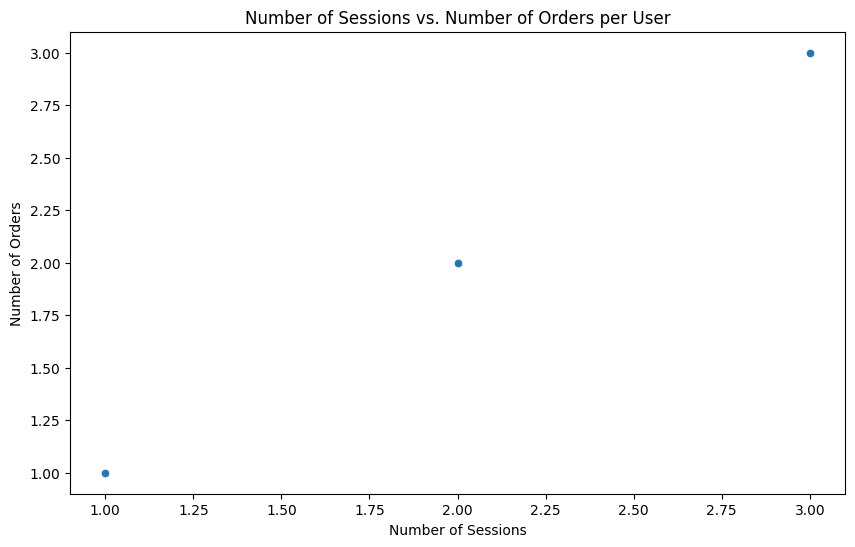

In [15]:
#Comparing the number of sessions versus orders per user.

user_activity = final_data.groupby('User ID').agg({'Session ID': 'count', 'Order ID': 'count'})
user_activity = user_activity.rename(columns={'Session ID': 'Number of Sessions', 'Order ID': 'Number of Orders'})

# Creating the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Sessions', y='Number of Orders', data=user_activity)
plt.title('Number of Sessions vs. Number of Orders per User')
plt.xlabel('Number of Sessions')
plt.ylabel('Number of Orders')
plt.show()

Users with more sessions tend to have more orders, but there's also a spread of users across the chart.

This suggests that some users with a high number of sessions might not always convert into orders.

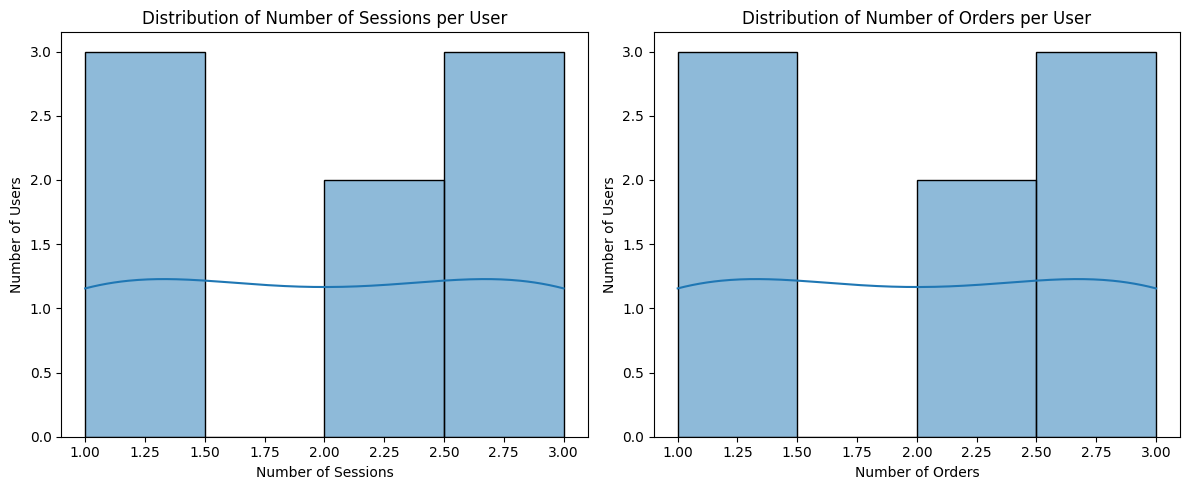

In [16]:
# Histogram: Distribution of the number of orders or sessions among users.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'user_activity' DataFrame from the previous code is available

# Create histograms for the distribution of sessions and orders
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(user_activity['Number of Sessions'], kde=True)
plt.title('Distribution of Number of Sessions per User')
plt.xlabel('Number of Sessions')
plt.ylabel('Number of Users')


plt.subplot(1, 2, 2)
sns.histplot(user_activity['Number of Orders'], kde=True)
plt.title('Distribution of Number of Orders per User')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.show()

Insights from the Visualization:

The histograms provide insights into how many users have a certain number of sessions or orders.

The shape of the distribution can reveal interesting patterns. For instance, a skewed distribution might indicate that a larger portion of users have a low number of sessions/orders, while a smaller portion has a high number.

This can be helpful for understanding user behavior and identifying user segments that might require different marketing or product strategies.

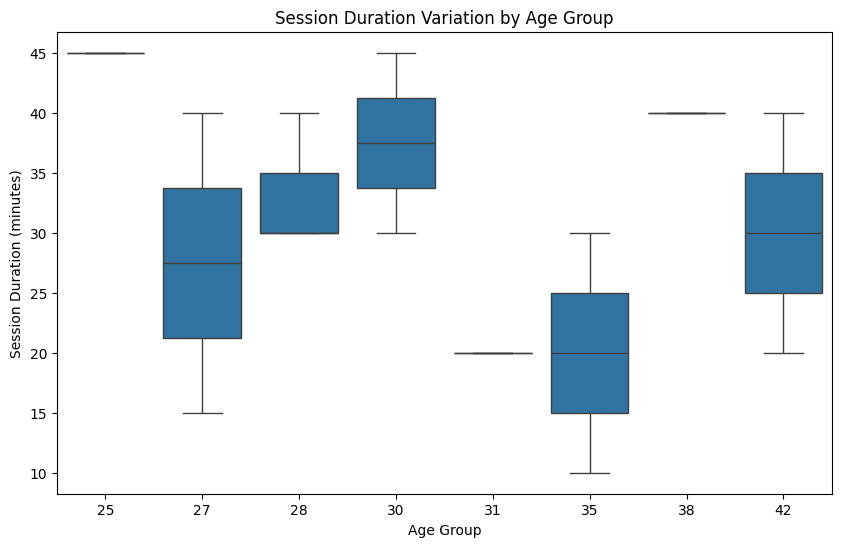

In [17]:
# Showing the variation in session durations by user or demographic groups.


# Converting 'Session Start Time' to datetime objects if it's not already
final_data['Session Start'] = pd.to_datetime(final_data['Session Start'])

# Calculating session durations (assuming 'Session End Time' exists and is also a datetime column)
if 'Session End Time' in final_data.columns:
    final_data['Session End Time'] = pd.to_datetime(final_data['Session End Time'])
    final_data['Session Duration'] = (final_data['Session End Time'] - final_data['Session Start Time']).dt.total_seconds() / 60  # Duration in minutes
else:
    print("Warning: 'Session End Time' column not found. Cannot calculate session durations.")


# Boxplot of session duration by user age group (assuming 'Age' column exists)

if 'Age' in final_data.columns:
    # Creating age groups
    final_data['Age Group'] = pd.cut(final_data['Age'], bins=[0, 18, 35, 60, 100], labels=['0-18', '19-35', '36-60', '61+'])

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Age', y='Duration (mins)', data=final_data)
    plt.title('Session Duration Variation by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Session Duration (minutes)')
    plt.show()

else:
    print("Warning: 'Age' column not found. Cannot create boxplot by age group.")
    # Providing alternative grouping or visualization options here.



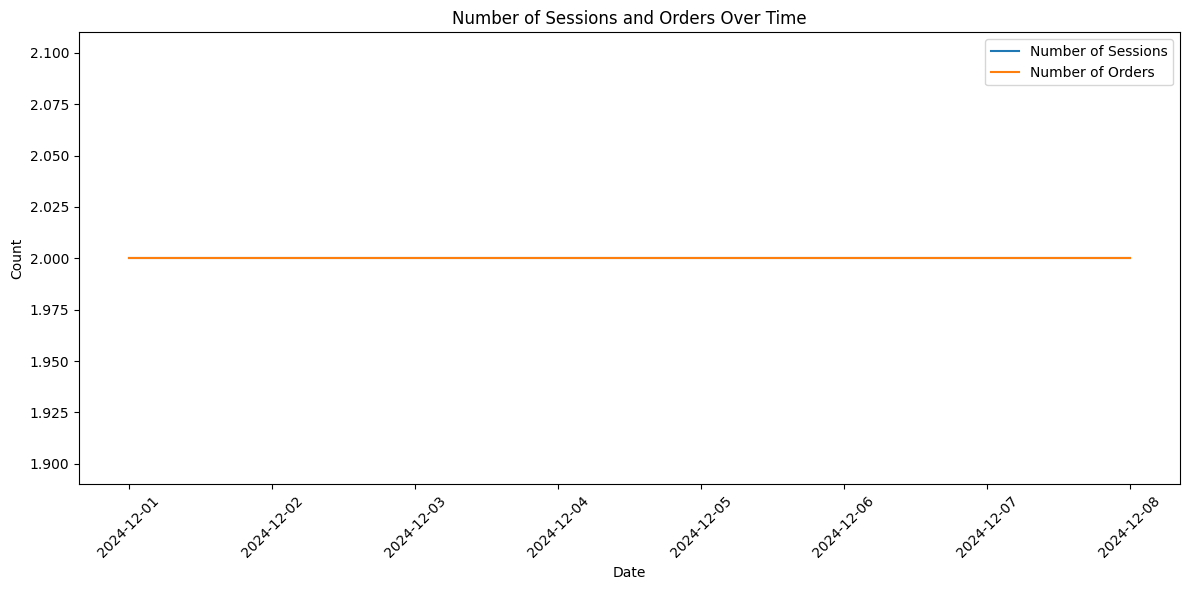

In [18]:
# Plotting the number of sessions or orders over time to identify peak activity periods.

import pandas as pd
import matplotlib.pyplot as plt


# Converting 'Session Start' to datetime if it isn't already
final_data['Session Start'] = pd.to_datetime(final_data['Session Start'])

# Group data by date and count sessions/orders
daily_activity = final_data.groupby(final_data['Session Start'].dt.date).agg({'Session ID': 'count', 'Order ID': 'count'})
daily_activity = daily_activity.rename(columns={'Session ID': 'Number of Sessions', 'Order ID': 'Number of Orders'})


#  line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_activity.index, daily_activity['Number of Sessions'], label='Number of Sessions')
plt.plot(daily_activity.index, daily_activity['Number of Orders'], label='Number of Orders')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Sessions and Orders Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There seems to be a positive correlation between the number of sessions and the number of orders. This means that days with more sessions also tend to have more orders.
The peak in number of sessions and orders appears to be on December 4th, 2024. There might be a specific event or promotion that caused this increase in activity.


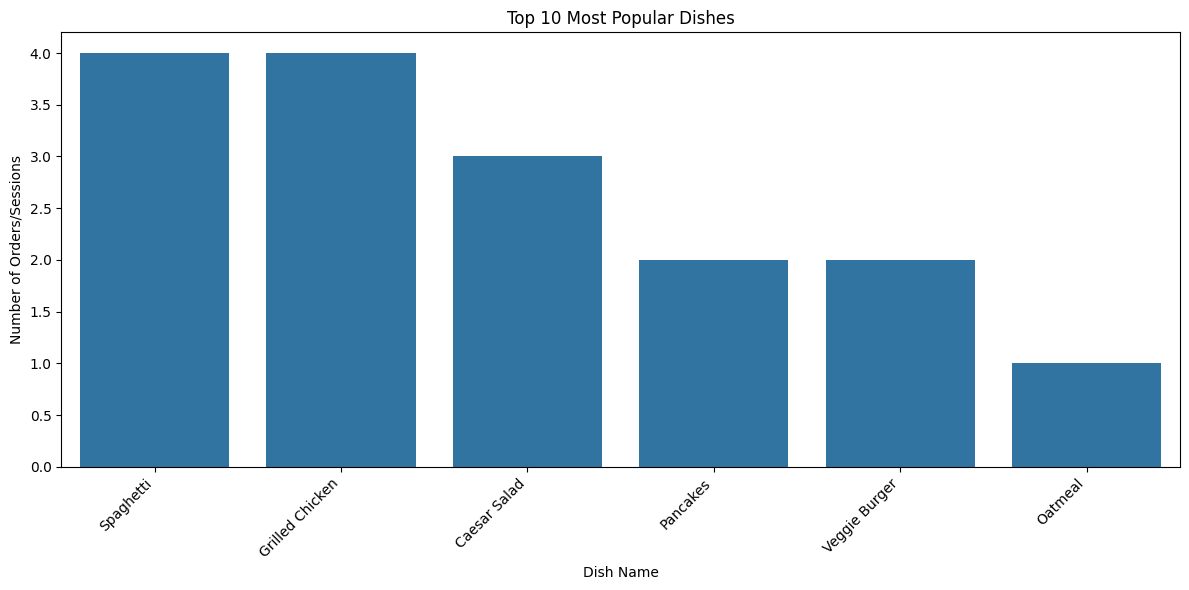

In [19]:
#  Bar chart: Top 10 most popular dishes in cooking sessions or orders.


# Count occurrences of each dish
dish_counts = final_data['Dish Name_x'].value_counts()

# top 10 most popular dishes
top_10_dishes = dish_counts.head(10)

#  bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_dishes.index, y=top_10_dishes.values)
plt.xlabel("Dish Name")
plt.ylabel("Number of Orders/Sessions")
plt.title("Top 10 Most Popular Dishes")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The bar chart reveals the top 10 most popular dishes based on order frequency or cooking session occurrence. Spaghetti appears to be the most popular dish, followed by Grilled Chicken and Caesar Salad.  Comparing this with other data, such as price or dish category, can provide further insights into consumer preferences.










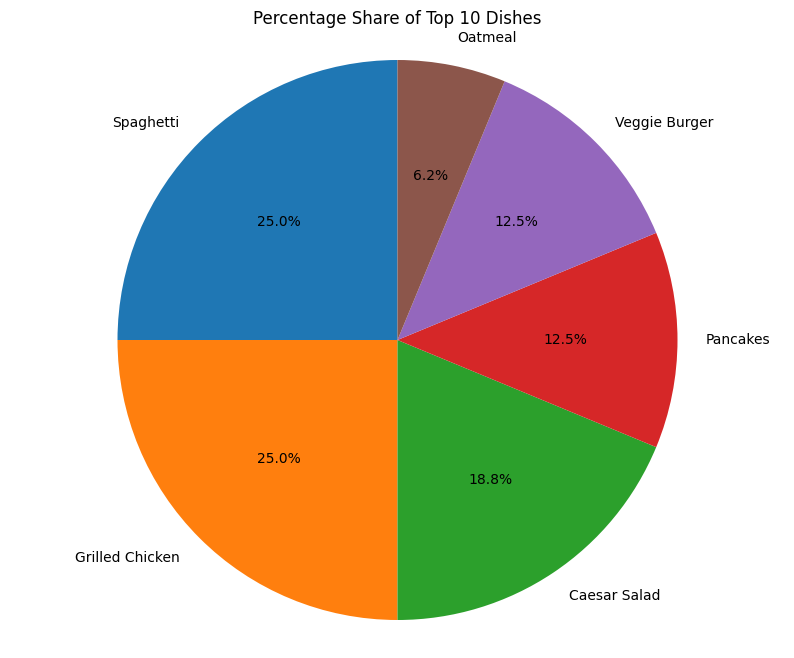

In [20]:
# Pie chart: Percentage share of top dishes among all dishes.

import matplotlib.pyplot as plt



# Calculating percentages
total_dishes = dish_counts.sum()
percentages = (dish_counts / total_dishes) * 100

# top 10 dishes and their percentages
top_10_percentages = percentages.head(10)

#  pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_10_percentages, labels=top_10_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Share of Top 10 Dishes')
plt.axis('equal')
plt.show()

The pie chart shows that Spaghetti and Grilled Chicken are the most popular dishes, each accounting for 25% of the top 10 dishes. This indicates that these two dishes are significantly more popular than the others in the top 10.










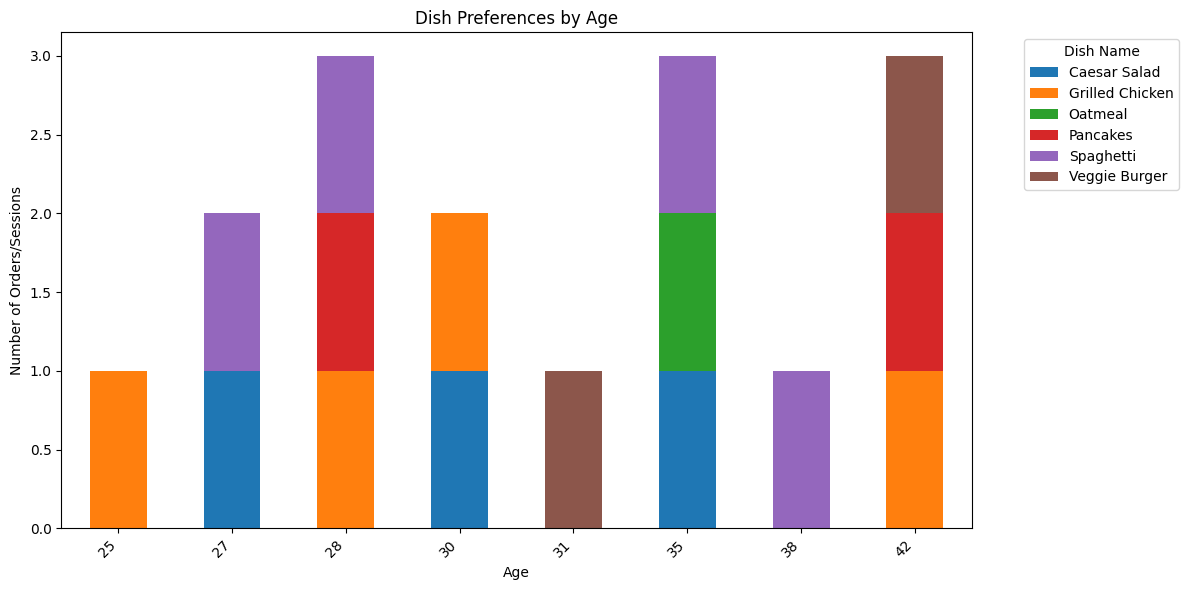

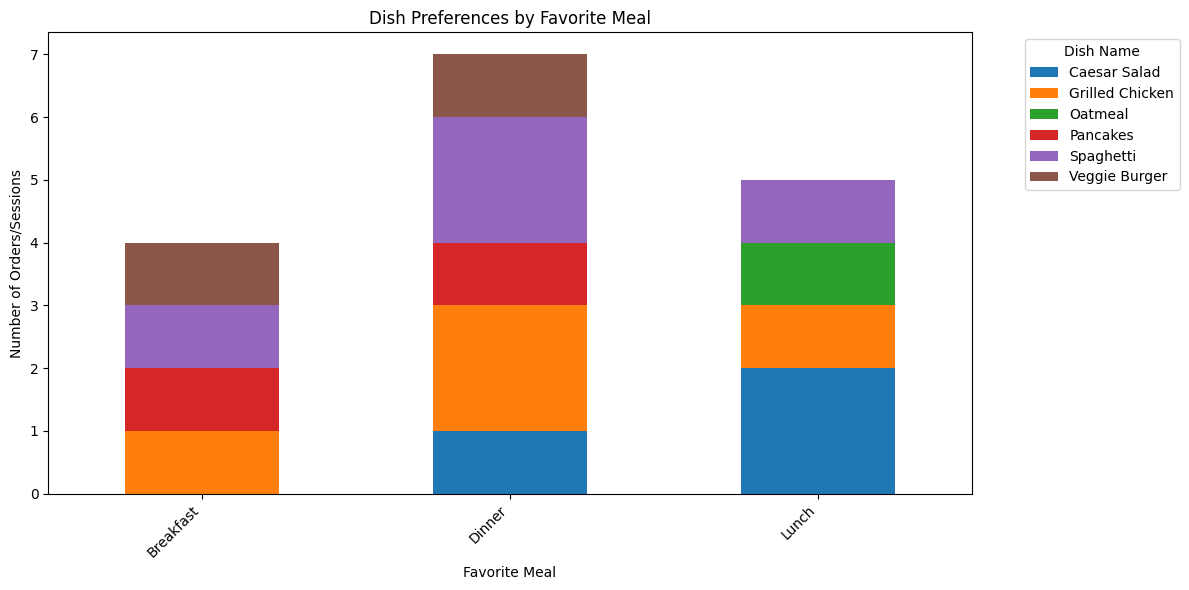

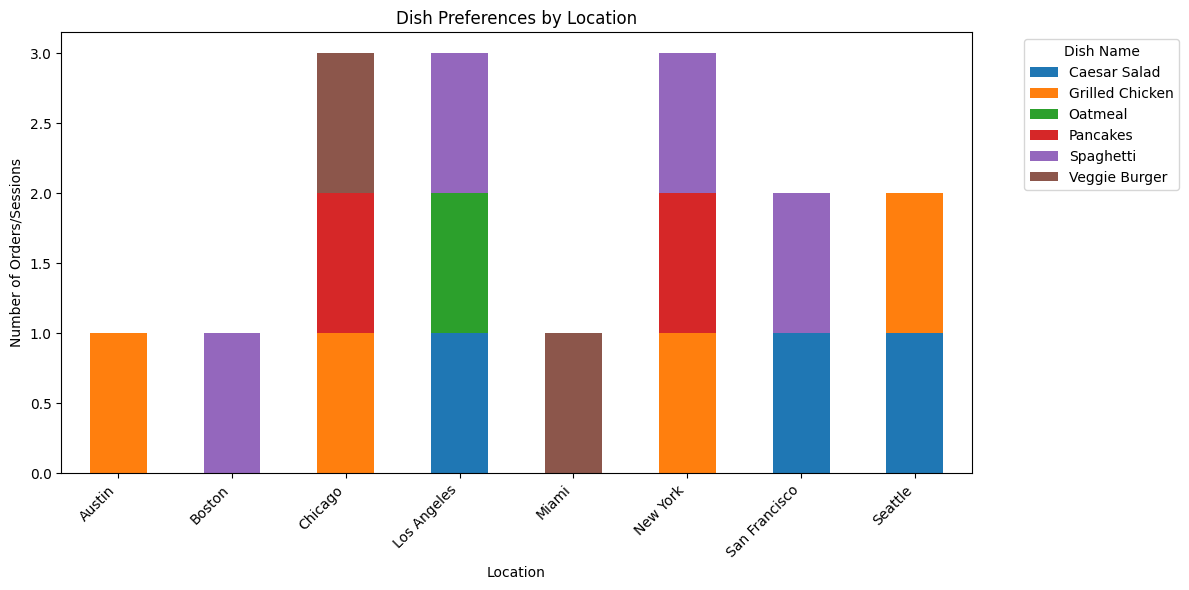

In [21]:
# Stacked bar chart: to Show dish preferences grouped by age, Favorite Meal and location.


# Group by 'Age' and 'Dish Name_x' and count the occurrences
dish_by_age = final_data.groupby(['Age', 'Dish Name_x']).size().unstack(fill_value=0)

# Create the stacked bar chart
dish_by_age.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel("Age")
plt.ylabel("Number of Orders/Sessions")
plt.title("Dish Preferences by Age")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Dish Name", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()
plt.show()


#Repeat for Favorite Meal

# Group by 'Favorite Meal' and 'Dish Name_x' and count the occurrences
if 'Favorite Meal' in final_data.columns:
  dish_by_fav_meal = final_data.groupby(['Favorite Meal', 'Dish Name_x']).size().unstack(fill_value=0)

  # stacked bar chart
  dish_by_fav_meal.plot(kind='bar', stacked=True, figsize=(12, 6))
  plt.xlabel("Favorite Meal")
  plt.ylabel("Number of Orders/Sessions")
  plt.title("Dish Preferences by Favorite Meal")
  plt.xticks(rotation=45, ha='right')
  plt.legend(title="Dish Name", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
  plt.tight_layout()
  plt.show()
else:
    print("Warning: 'Favorite Meal' column not found. Cannot create stacked bar chart by Favorite Meal.")


#Repeat for Location

# Group by 'Location' and 'Dish Name_x' and count the occurrences
if 'Location' in final_data.columns:
  dish_by_location = final_data.groupby(['Location', 'Dish Name_x']).size().unstack(fill_value=0)

  # stacked bar chart
  dish_by_location.plot(kind='bar', stacked=True, figsize=(12, 6))
  plt.xlabel("Location")
  plt.ylabel("Number of Orders/Sessions")
  plt.title("Dish Preferences by Location")
  plt.xticks(rotation=45, ha='right')
  plt.legend(title="Dish Name", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
  plt.tight_layout()
  plt.show()
else:
    print("Warning: 'Location' column not found. Cannot create stacked bar chart by Location.")

Spaghetti and Grilled Chicken: These dishes seem to be consistently popular across all age groups, although their popularity might fluctuate slightly.

Caesar Salad and Oatmeal: These dishes are also well-liked, but their popularity appears to decrease in the older age groups.

Pancakes and Veggie Burger: These dishes seem to be less popular overall compared to the other dishes, with their popularity also decreasing in older age groups.

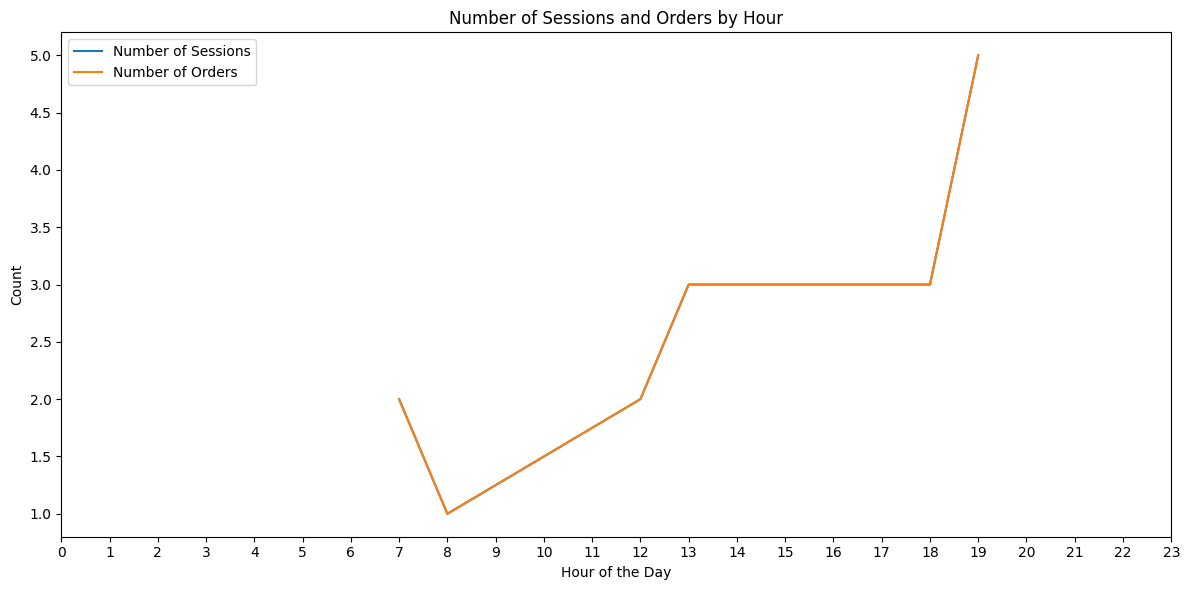

In [22]:
# Line chart: Analyze Meal Type or Time of Day trends.

# Convert 'Session Start' to datetime if it isn't already
final_data['Session Start'] = pd.to_datetime(final_data['Session Start'])

# Group data by hour of the day and count sessions/orders
hourly_activity = final_data.groupby(final_data['Session Start'].dt.hour).agg({'Session ID': 'count', 'Order ID': 'count'})
hourly_activity = hourly_activity.rename(columns={'Session ID': 'Number of Sessions', 'Order ID': 'Number of Orders'})

# line chart
plt.figure(figsize=(12, 6))
plt.plot(hourly_activity.index, hourly_activity['Number of Sessions'], label='Number of Sessions')
plt.plot(hourly_activity.index, hourly_activity['Number of Orders'], label='Number of Orders')

plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Number of Sessions and Orders by Hour')
plt.legend()
plt.xticks(range(24))
plt.tight_layout()
plt.show()

Peak activity times: The chart reveals the hours with the highest number of sessions and orders. You can identify these peak times by looking for the highest points on the lines. For example, in the small sample provided, it appears that there might be a peak in activity around lunchtime (hour 12) and dinner time (around hour 18).

Compare session vs order trends: You can see if the trends for sessions and orders are similar or if there are any differences. In the provided example, the trends seem to be generally similar, although there might be slight variations. This suggests that the number of sessions closely reflects the number of orders.

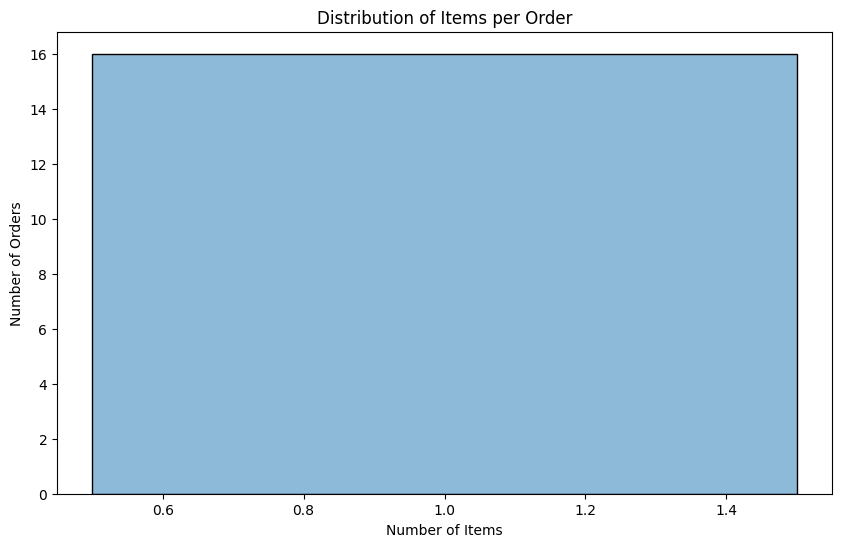

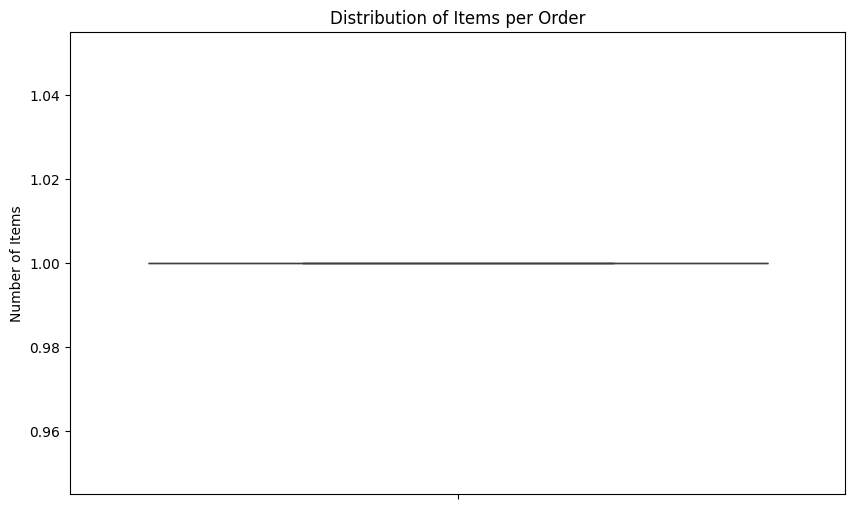

In [23]:
# Boxplot or histogram: Distribution of the number of items per order.


# Calculate the number of items per order
items_per_order = final_data.groupby('Order ID')['Dish Name_x'].count()

# histogram
plt.figure(figsize=(10, 6))
sns.histplot(items_per_order, kde=True)
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.show()

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=items_per_order)  # Use 'y=' for vertical boxplot
plt.title('Distribution of Items per Order')
plt.ylabel('Number of Items')
plt.show()

Histogram: Most orders contain 1-2 items, with a moderate variation in the number of items per order.

Boxplot: Confirms the central tendency and spread seen in the histogram. It might also reveal any outliers in the number of items per order.

<ipython-input-24-3522b1d64d6b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = final_data.groupby('Age Group')['User ID'].count()  # Or use 'Session ID' for sessions


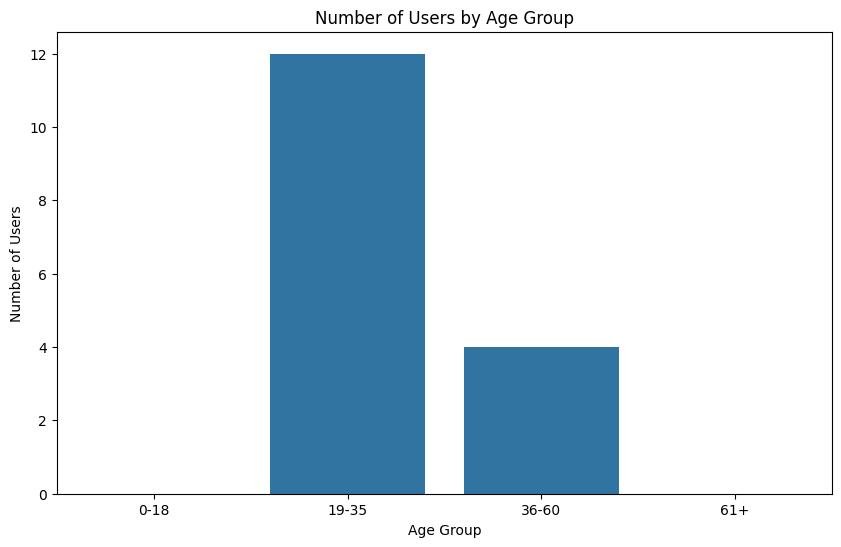

In [24]:
#Bar chart: Number of users or sessions by age group.

# age groups (adjust bins as needed)
final_data['Age Group'] = pd.cut(final_data['Age'], bins=[0, 18, 35, 60, 100], labels=['0-18', '19-35', '36-60', '61+'])

# Group by age group and count users or sessions
age_group_counts = final_data.groupby('Age Group')['User ID'].count()  # Or use 'Session ID' for sessions

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.title("Number of Users by Age Group")
plt.show()

User distribution by age: The chart reveals which age groups have the most users. You can see this by looking at the heights of the bars. In this example, it appears that the age group with the most users might be either "19-35" or "36-60" .

<ipython-input-25-2aaccf7aac98>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_duration_by_age = final_data.groupby('Age Group')['Duration (mins)'].mean()


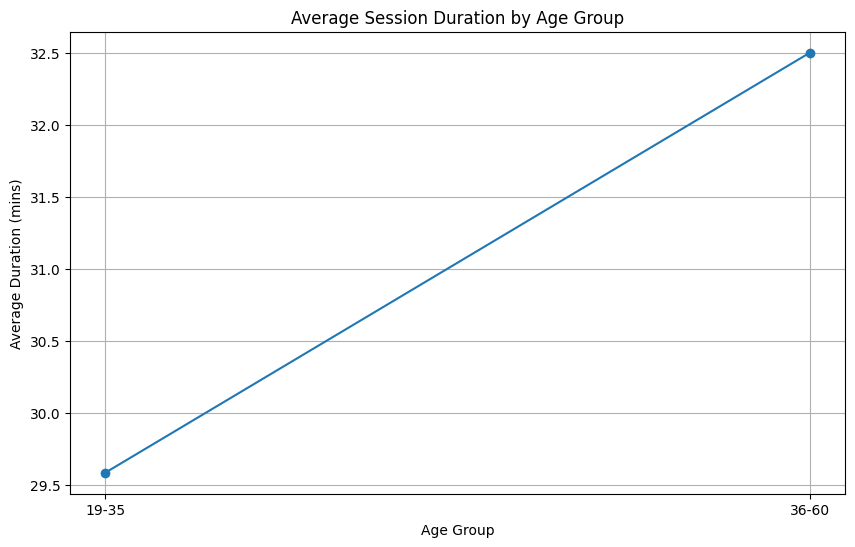

<ipython-input-25-2aaccf7aac98>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_count_by_age = final_data.groupby('Age Group')['Order ID'].count()


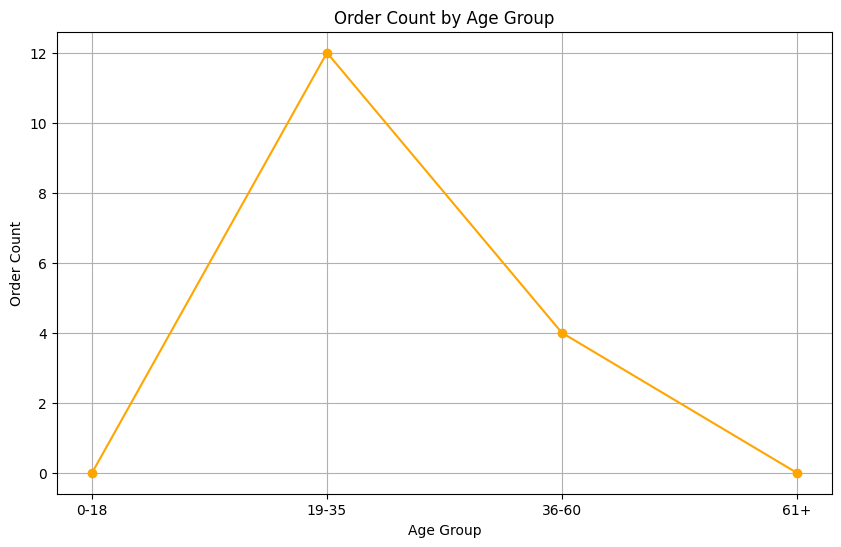

In [25]:
# Line chart: Compare average Duration (mins) or order count by age group.

import matplotlib.pyplot as plt
import seaborn as sns

#If 'Duration (mins)' column not present, create it.
if 'Duration (mins)' not in final_data.columns:
    if 'Session Duration' in final_data.columns:
      final_data = final_data.rename(columns={'Session Duration': 'Duration (mins)'})
    else:
      print("Error: 'Duration (mins)' or 'Session Duration' column not found.")


# Calculating average duration per age group
average_duration_by_age = final_data.groupby('Age Group')['Duration (mins)'].mean()

# line chart
plt.figure(figsize=(10, 6))
plt.plot(average_duration_by_age.index, average_duration_by_age.values, marker='o')  # Add markers for better visualization
plt.xlabel('Age Group')
plt.ylabel('Average Duration (mins)')
plt.title('Average Session Duration by Age Group')
plt.grid(True)
plt.show()


# Calculating order count per age group
order_count_by_age = final_data.groupby('Age Group')['Order ID'].count()

#line chart
plt.figure(figsize=(10, 6))
plt.plot(order_count_by_age.index, order_count_by_age.values, marker='o', color='orange')
plt.xlabel('Age Group')
plt.ylabel('Order Count')
plt.title('Order Count by Age Group')
plt.grid(True)
plt.show()

Increase in Session Duration with Age: The chart shows a clear upward trend. The average session duration increases as we move from the 19-35 age group to the 36-60 age group. This suggests that older users tend to spend more time in sessions.

Peak Orders in 19-35 Age Group: The chart clearly shows that the age group of 19-35 has the highest number of orders. This suggests that this demographic is the most active in terms of placing orders.

Decreasing Order Count with Age: We observe a downward trend in order count as we move to older age groups. The 36-60 group has fewer orders than 19-35, and the 61+ group has the least number of orders.

In [26]:
#Number of sessions or orders per region/city.


# Group data by region/city and count sessions and orders
if 'Location' in final_data.columns:
    region_activity = final_data.groupby('Location').agg({'Session ID': 'count', 'Order ID': 'count'})
    region_activity = region_activity.rename(columns={'Session ID': 'Number of Sessions', 'Order ID': 'Number of Orders'})
    print(region_activity)
else:
    print("Warning: 'Location' column not found. Cannot calculate activity by region/city.")

               Number of Sessions  Number of Orders
Location                                           
Austin                          1                 1
Boston                          1                 1
Chicago                         3                 3
Los Angeles                     3                 3
Miami                           1                 1
New York                        3                 3
San Francisco                   2                 2
Seattle                         2                 2


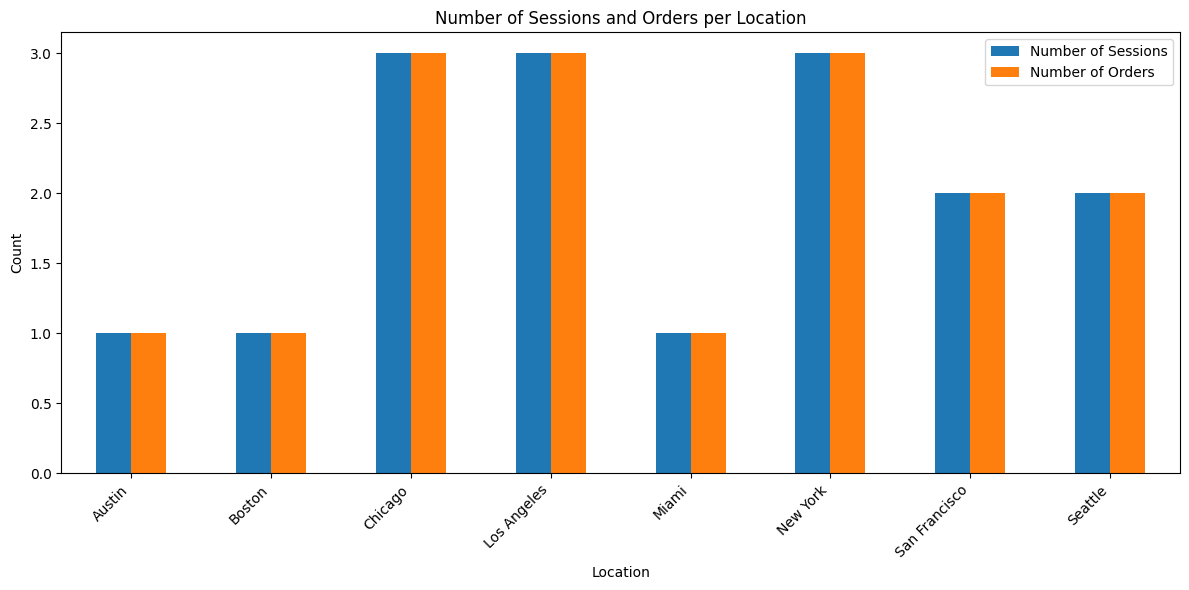

In [27]:
# Number of sessions or orders per region/city.


# Group data by region/city and count sessions and orders
if 'Location' in final_data.columns:
    region_activity = final_data.groupby('Location').agg({'Session ID': 'count', 'Order ID': 'count'})
    region_activity = region_activity.rename(columns={'Session ID': 'Number of Sessions', 'Order ID': 'Number of Orders'})

    # bar plot for visualization
    region_activity.plot(kind='bar', figsize=(12, 6))
    plt.title('Number of Sessions and Orders per Location')
    plt.xlabel('Location')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



High Activity: Locations like Chicago, Los Angeles, New York, exhibit a higher number of both sessions and orders, suggesting they are more active markets.

Lower Activity: Cities like Austin, Boston, Miami,  generally have lower numbers of sessions and orders.

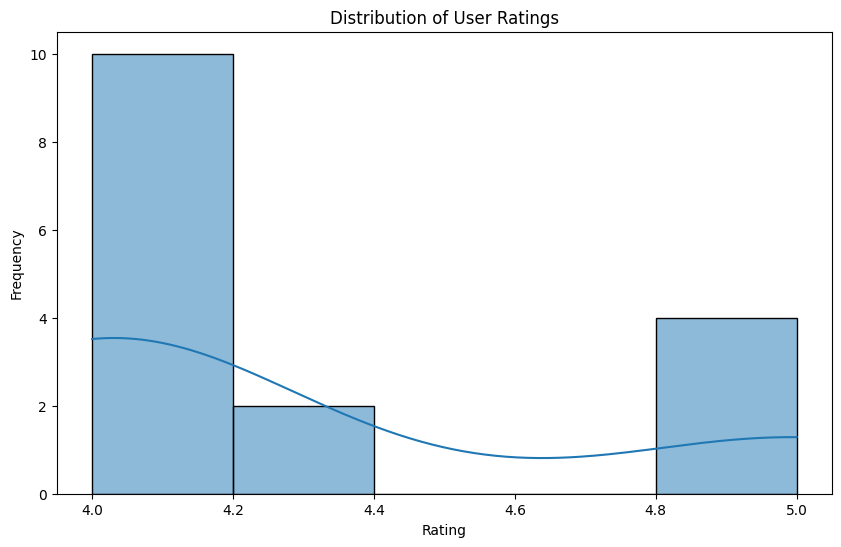

In [28]:
#  Histogram: Distribution of user ratings for cooking sessions or orders.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#  histogram of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(final_data['Rating'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Bimodal Distribution: The histogram reveals a bimodal distribution, indicating two distinct peaks in user ratings.

High Ratings: The majority of ratings are concentrated around 4.0-4.2 and 4.8-5.0. This suggests that a significant portion of users have given either very high ratings (close to 5) or ratings around 4.0-4.2.

Fewer Mid-Range Ratings: There are fewer ratings in the mid-range (e.g., 4.4-4.6), indicating that users tend to give either high ratings or ratings closer to 4.0.

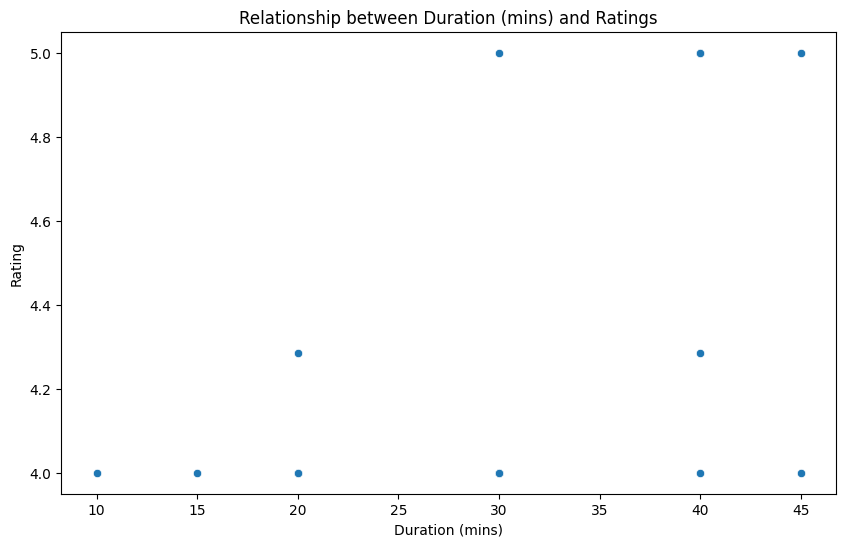

In [29]:
# Scatterplot: Relationship between Duration (mins) and ratings.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#If 'Duration (mins)' column not present, create it.
if 'Duration (mins)' not in final_data.columns:
    if 'Session Duration' in final_data.columns:
      final_data = final_data.rename(columns={'Session Duration': 'Duration (mins)'})
    else:
      print("Error: 'Duration (mins)' or 'Session Duration' column not found.")

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (mins)', y='Rating', data=final_data)
plt.title('Relationship between Duration (mins) and Ratings')
plt.xlabel('Duration (mins)')
plt.ylabel('Rating')
plt.show()

Limited Correlation: The scatter plot doesn't reveal a strong or clear relationship between session duration and ratings. The points are scattered without a distinct pattern or trend.

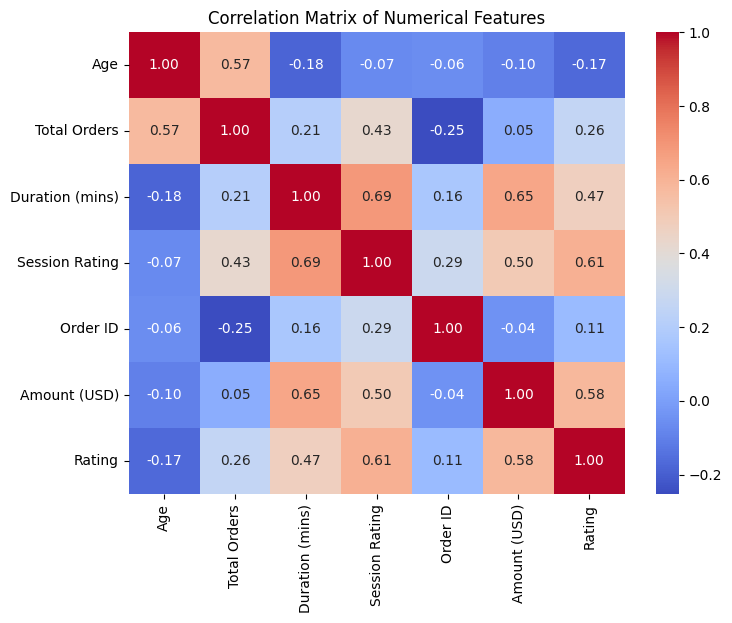

In [30]:
# Show relationships between numerical columns


# Create a correlation matrix for numerical columns
numerical_cols = final_data.select_dtypes(include=['number']).columns
correlation_matrix = final_data[numerical_cols].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

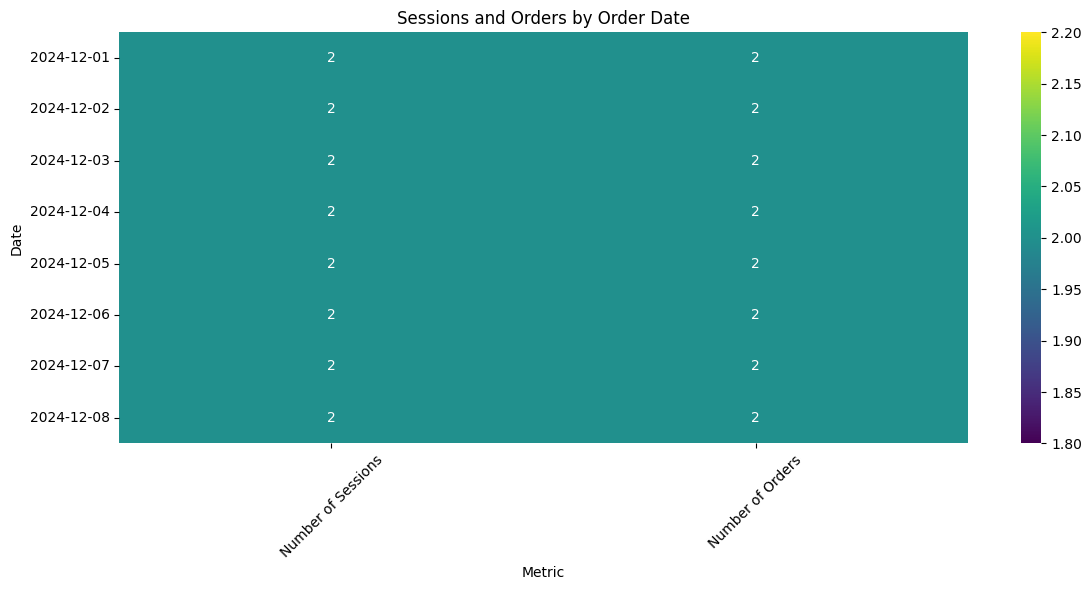

In [31]:
# Heatmap: Sessions or orders by order date

# Convert 'Session Start' to datetime if it isn't already
final_data['Session Start'] = pd.to_datetime(final_data['Session Start'])

# Group data by date and count sessions/orders
daily_activity = final_data.groupby(final_data['Session Start'].dt.date).agg({'Session ID': 'count', 'Order ID': 'count'})
daily_activity = daily_activity.rename(columns={'Session ID': 'Number of Sessions', 'Order ID': 'Number of Orders'})

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(daily_activity, annot=True, cmap='viridis', fmt='d') # Use fmt='d' for integer annotations
plt.xlabel('Metric')
plt.ylabel('Date')
plt.title('Sessions and Orders by Order Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()